# KELOMPOK 4 PADANG CUISINE (Indonesian Food Image Dataset)
# Al-Inayya 2009106127
# Muh. Rizeky Rahmatullah 2009106114
# Agustinus Syama 2009106150

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from keras_preprocessing.image import ImageDataGenerator

## **Normalize Image Pixels**

In [2]:
#Al-Inayya
training_path = r'D:\folder kiki\kuliah semester 5\praktikum KB\pa\data_tvt\training'
validation_path = r'D:\folder kiki\kuliah semester 5\praktikum KB\pa\data_tvt\validation'
testing_path = r'D:\folder kiki\kuliah semester 5\praktikum KB\pa\data_tvt\testing'

In [3]:
image_data_generator = ImageDataGenerator(
    rescale=1./255
)

In [4]:
training_generator = image_data_generator.flow_from_directory(
    training_path,
    target_size=(128, 128),
    batch_size=64,
    color_mode='rgb',
    shuffle=True,
    class_mode='categorical'
)

validation_generator = image_data_generator.flow_from_directory(
    validation_path,
    target_size=(128, 128),
    batch_size=8,
    color_mode='rgb',
    shuffle=True,
    class_mode='categorical'
)

testing_generator = image_data_generator.flow_from_directory(
    testing_path,
    target_size=(128, 128),
    batch_size=8,
    color_mode='rgb',
    shuffle=True,
    class_mode='categorical'
)

Found 993 images belonging to 9 classes.
Found 876 images belonging to 9 classes.
Found 871 images belonging to 9 classes.


# Model

In [5]:
#Al-Inayya
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=[128, 128, 3]),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax'),
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 56448)             0         
                                                                 
 dense (Dense)               (None, 64)                3612736   
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 3,614,217
Trainable params: 3,614,217
Non-trainable params: 0
______________________________________________

In [7]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
hasil_model = model.fit(
    training_generator,
    epochs=20,
    validation_data= validation_generator
)

Epoch 1/20
16/16 [==============================] - 6s 334ms/step - loss: 3.0140 - accuracy: 0.1571 - val_loss: 2.0793 - val_accuracy: 0.2591
Epoch 2/20
16/16 [==============================] - 5s 316ms/step - loss: 1.8695 - accuracy: 0.3353 - val_loss: 1.6680 - val_accuracy: 0.4075
Epoch 3/20
16/16 [==============================] - 5s 334ms/step - loss: 1.5365 - accuracy: 0.4350 - val_loss: 1.3734 - val_accuracy: 0.5228
Epoch 4/20
16/16 [==============================] - 5s 315ms/step - loss: 1.2432 - accuracy: 0.5992 - val_loss: 1.0310 - val_accuracy: 0.7032
Epoch 5/20
16/16 [==============================] - 5s 311ms/step - loss: 0.9832 - accuracy: 0.7080 - val_loss: 0.9049 - val_accuracy: 0.7078
Epoch 6/20
16/16 [==============================] - 5s 308ms/step - loss: 0.8528 - accuracy: 0.7372 - val_loss: 0.7389 - val_accuracy: 0.7751
Epoch 7/20
16/16 [==============================] - 5s 310ms/step - loss: 0.7146 - accuracy: 0.7946 - val_loss: 0.6118 - val_accuracy: 0.8299
Epoch 

In [9]:
model.evaluate(testing_generator)

109/109 [==============================] - 2s 15ms/step - loss: 0.0646 - accuracy: 0.9989


[0.06457648426294327, 0.9988518953323364]

## Visualisasi Model

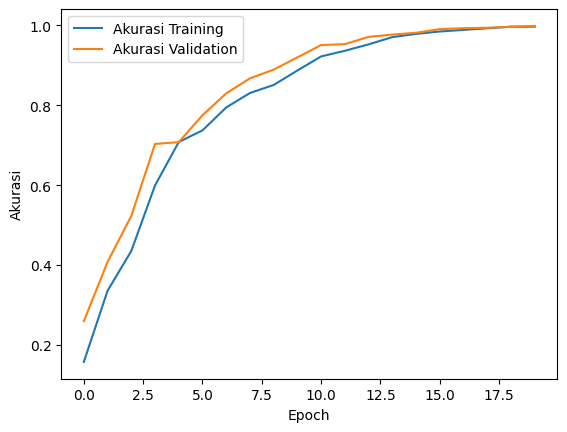

In [10]:
#Agustinus

#Accuracy

plt.plot(hasil_model.history['accuracy'], label='Akurasi Training')
plt.plot(hasil_model.history['val_accuracy'], label='Akurasi Validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.show()

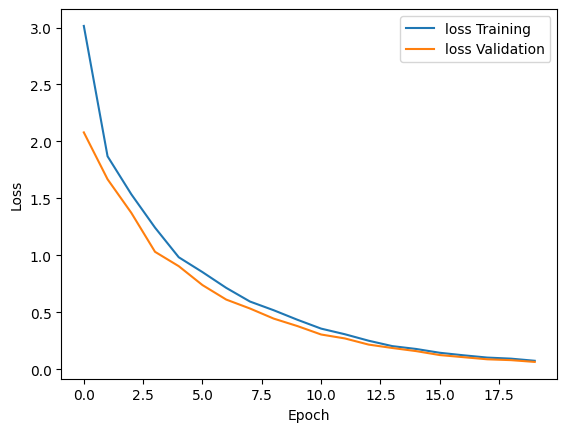

In [11]:
#Loss

plt.plot(hasil_model.history['loss'], label='loss Training')
plt.plot(hasil_model.history['val_loss'], label='loss Validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Predict

In [12]:
image, label = testing_generator.next()

In [13]:
labelsPred = ['ayam_goreng', 'ayam_pop', 'daging_rendang', 'dendeng_batokok', 'gulai_ikan','gulai_tambusu','gulai_tunjang','telur_balado','telur_dadar']

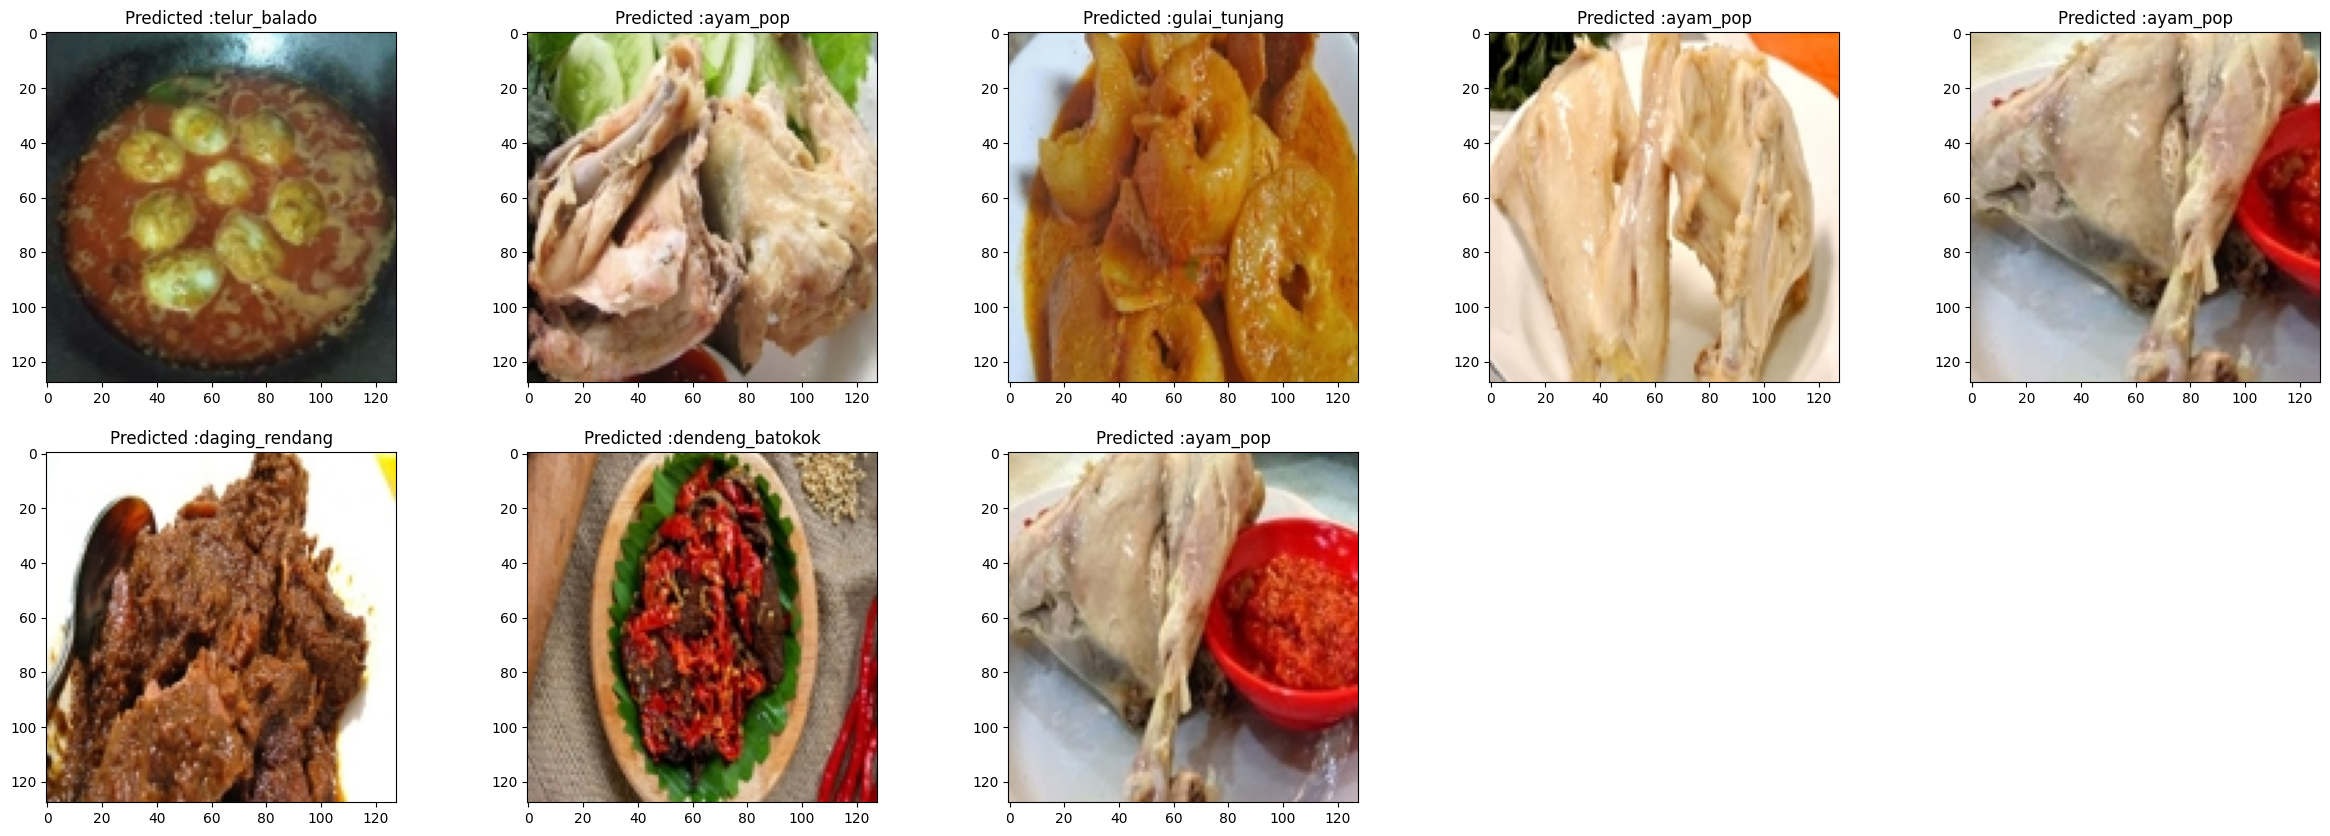

In [14]:
fig = plt.figure(figsize = (30,10))

isi = 8
for i in range(isi):
    plt.subplot(2, 5, i+1)
    plt.title(f'Predicted :{labelsPred[tf.argmax(label[i])]}')
    plt.imshow(image[i])
